# Airline Passenger Satisfatcion Classification

### This model tries to understand the services of an aviation company through a passenger satisfaction survey

# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np

# Pandas Set Options

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Upload Datasets

In [3]:
df_test = pd.read_csv(os.path.join(Path(os.getcwd()).parents[0], 'data', 'test.csv'))
df_train = pd.read_csv(os.path.join(Path(os.getcwd()).parents[0], 'data', 'train.csv'))

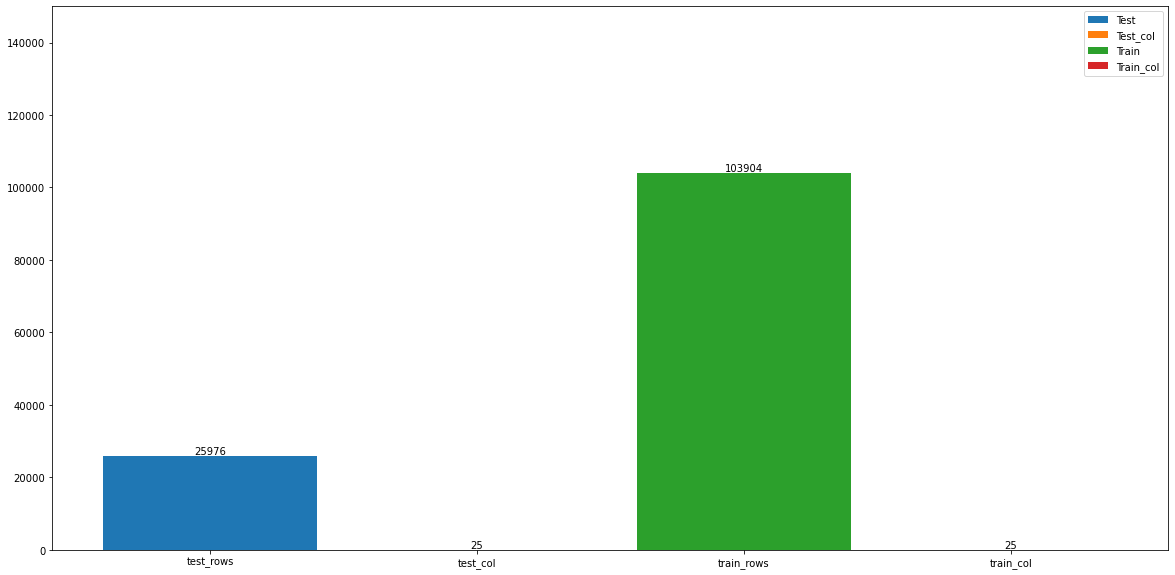

In [4]:
fig, ax = plt.subplots(figsize =(20, 10))

test = ax.bar('test_rows', df_test.shape[0], label='Test')
test_col = ax.bar('test_col', df_test.shape[1], label='Test_col')

train = ax.bar('train_rows', df_train.shape[0], label='Train')
train_col = ax.bar('train_col', df_train.shape[1], label='Train_col')

ax.bar_label(test, label_type='edge')
ax.bar_label(train, label_type='edge')

ax.bar_label(test_col, label_type='edge')
ax.bar_label(train_col, label_type='edge')
plt.ylim(0, 150000)
plt.legend()

plt.show()

## 1.1 Concatenating the Datasets

In [5]:
df_concat = pd.concat([df_train, df_test]).reset_index()

In [6]:
df_concat.head()

,index,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## 1.2 Renaming columns

In [7]:
df_rename = df_concat.copy()

In [8]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   index                              129880 non-null  int64  
 1   Unnamed: 0                         129880 non-null  int64  
 2   id                                 129880 non-null  int64  
 3   Gender                             129880 non-null  object 
 4   Customer Type                      129880 non-null  object 
 5   Age                                129880 non-null  int64  
 6   Type of Travel                     129880 non-null  object 
 7   Class                              129880 non-null  object 
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

In [9]:
df_rename.columns

Index(['index', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
new_columns = [
    new_name.replace(' ', '_').lower()
    for new_name in df_rename.columns
    ]

In [11]:
df_rename.columns = new_columns

### 1.2.1 Initial data cleaning

In [12]:
len(df_rename['id'].unique())

129880

In [13]:
drop_cols = ['index', 'unnamed:_0', 'id']
df_rename.drop(drop_cols, axis = 1, inplace = True)

#### A: There's no duplicate ids. So, there's no reason to maintain this attribute

# 2. Data exploratory analysis

In [14]:
df_exploratory = df_rename.copy()

#### Q.1: Is any null value?

In [15]:
df_exploratory.columns[df_exploratory.isnull().any()]

Index(['arrival_delay_in_minutes'], dtype='object')

In [16]:
df_exploratory.isnull().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

#### A.1: Only one attribute have 393 null objects. That represents 0.3% of the data.

In [17]:
# Descriptive Data Analysis
df_exploratory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   class                              129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure/arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [18]:
# Count of dtypes
df_exploratory.dtypes.value_counts()

int64      17
object      5
float64     1
dtype: int64

In [19]:
# A small sample
df_exploratory.sample(n = 5, random_state = 42)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
103044,Male,Loyal Customer,66,Personal Travel,Eco,1678,3,2,3,2,4,3,4,4,4,3,2,3,2,4,0,0.0,neutral or dissatisfied
43282,Female,Loyal Customer,38,Business travel,Business,954,2,2,2,2,2,3,1,4,4,4,4,2,4,4,3,0.0,satisfied
65543,Female,Loyal Customer,38,Business travel,Eco,189,2,1,1,1,2,2,2,2,1,2,4,1,4,2,0,0.0,neutral or dissatisfied
65083,Female,Loyal Customer,32,Personal Travel,Eco,175,2,5,2,1,1,2,1,1,3,5,4,5,4,1,0,0.0,neutral or dissatisfied
76496,Male,Loyal Customer,33,Business travel,Business,1990,5,5,5,5,4,4,4,4,4,1,5,5,1,4,0,0.0,satisfied


In [20]:
# Memory usage
print(df_exploratory.memory_usage()[2] / 8, 'Bytes')

129880.0 Bytes


In [21]:
# Some statistical numbers
df_exploratory.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,129880,2,Female,65899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_type,129880,2,Loyal Customer,106100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,129880.0,NaN,NaN,NaN,39.427957,15.11936,7.0,27.0,40.0,51.0,85.0
type_of_travel,129880,2,Business travel,89693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,129880,3,Business,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight_distance,129880.0,NaN,NaN,NaN,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
inflight_wifi_service,129880.0,NaN,NaN,NaN,2.728696,1.32934,0.0,2.0,3.0,4.0,5.0
departure/arrival_time_convenient,129880.0,NaN,NaN,NaN,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,129880.0,NaN,NaN,NaN,2.756876,1.40174,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,NaN,NaN,NaN,2.976925,1.27852,0.0,2.0,3.0,4.0,5.0


In [22]:
# Dimensions
df_exploratory.ndim

2

#### Age distribution

C:\Users\viniciushc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


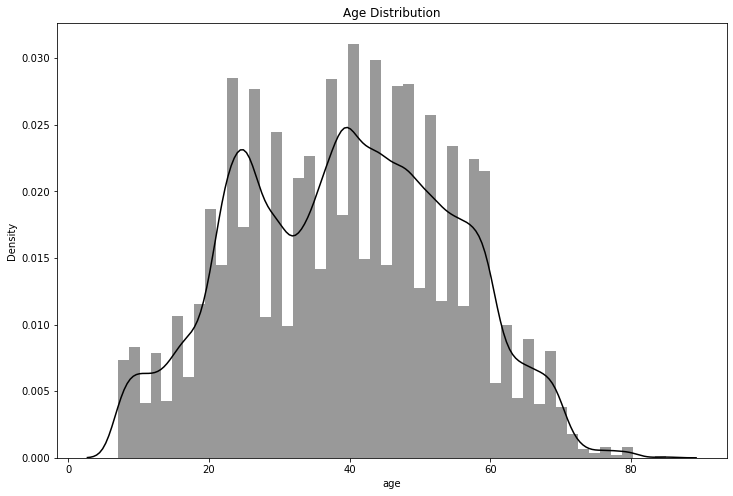

In [23]:
hist, ax = plt.subplots(figsize = (12, 8))

ax = sns.distplot(df_exploratory['age'], kde = True, color = 'black', norm_hist = True)
ax.set_title("Age Distribution")
plt.show()

#### Q.2: What is the proportion of male and female for Loyal Customer?

In [24]:
# Total of each gender
n_male = df_exploratory[df_exploratory['gender'] == 'Male'].count()[0]
n_female = df_exploratory[df_exploratory['gender'] == 'Female'].count()[0]

# Total of each gender for Loyal Customer
n_male_loyal = df_exploratory[(df_exploratory['gender'] == 'Male') & (df_exploratory['customer_type'] == 'Loyal Customer')].count()[0]
n_female_loyal = df_exploratory[(df_exploratory['gender'] == 'Female') & (df_exploratory['customer_type'] == 'Loyal Customer')].count()[0]

In [25]:
# Proportion of female that are loyal customers
proportion_fem = n_female_loyal / n_female * 100

# # Proportion of male that are loyal customers
proportion_male = n_male_loyal / n_male * 100

print(f'Loyal customers proportion: \n MALE: {proportion_male:.2f}% \n FEMALE: {proportion_fem:.2f}%')

Loyal customers proportion: 
 MALE: 82.91% 
 FEMALE: 80.51%


#### A.2: Loyal customers proportion: 
        MALE: 82.91%
        FEMALE: 80.51%

#### Q.3: From the proportion of Loyal Customers what is the proportion of male and female that flew in Business class?

In [26]:
# Proportion of male that flew in the business class
n_male_loyal_business = df_exploratory[(df_exploratory['gender'] == 'Male')
                            & (df_exploratory['customer_type'] == 'Loyal Customer')
                            & (df_exploratory['class'] == 'Business')].count()[0]

# Proportion of female that flew in the business class
n_female_loyal_business = df_exploratory[(df_exploratory['gender'] == 'Female')
                            & (df_exploratory['customer_type'] == 'Loyal Customer')
                            & (df_exploratory['class'] == 'Business')].count()[0]

In [27]:
# Proportion of female that flew in the business class
proportion_fem_class = n_female_loyal_business / n_female_loyal * 100

# Proportion of male that flew in the business class
proportion_mal_class = n_male_loyal_business / n_male_loyal * 100

print(f'Loyal customers that flew in the business class proportion: \n MALE: {proportion_mal_class:.2f}% \n FEMALE: {proportion_fem_class:.2f}%')

Loyal customers that flew in the business class proportion: 
 MALE: 49.84% 
 FEMALE: 49.94%


#### A.3: Loyal customers that flew in the business class proportion: 
        MALE: 49.84% 
        FEMALE: 49.94%

#### Q.4: What is the proportion of customers that evaluated the company with an overall under 30 points?

In [28]:

points_customer_satis = df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']][(df_exploratory.iloc[ : , 6 : -3].sum(axis = 1) <= 30) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]             
points_customer_neut = df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']][(df_exploratory.iloc[ : , 6 : -3].sum(axis = 1) <= 30) & (df_exploratory['satisfaction'] == 'neutral or dissatisfied')].count()[0]

print(f'Only {points_customer_satis / points_customer_neut *100:.2f}% of the passengers who rated the company below 30 points classified with "satisfied"')

Only 15.05% of the passengers who rated the company below 30 points classified with "satisfied"


#### A.4: Only 15.05% of passengers who rated the company below 30 points classified it as "satisfied"


In [29]:
df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']] \
              [(df_exploratory.iloc[ : , 6 : -3]
              .sum(axis = 1) <= 15) & (df_exploratory['satisfaction'])]

,gender,customer_type,age,type_of_travel,class,satisfaction
20959,Male,Loyal Customer,32,Business travel,Eco,satisfied
89930,Female,Loyal Customer,22,Business travel,Business,satisfied


#### Only two customers (loyal customers) that the overall points was less than 15 and yet classified with "satisfied"

In [30]:
df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']] \
              [(df_exploratory.iloc[ : , 6 : -3]
              .sum(axis = 1) < 30) & (df_exploratory['satisfaction'] == 'neutral or dissatisfied')].count()

gender            5065
customer_type     5065
age               5065
type_of_travel    5065
class             5065
satisfaction      5065
dtype: int64

In [31]:
null_satis = df_exploratory[(df_exploratory['arrival_delay_in_minutes'].isnull()) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]
null_total = df_exploratory[df_exploratory['arrival_delay_in_minutes'].isnull()].count()[0]

print(f'From null values the proportion of customers that classified with "satisfied" is: \n {null_satis / null_total * 100:.2f}%')

From null values the proportion of customers that classified with "satisfied" is: 
 42.24%


#### From null values the proportion of customers that classified with "satisfied" is: 
        42.24%

In [32]:
# Descriptive analysis
df_exploratory.groupby(['age', 'customer_type', 'class'])['satisfaction'].value_counts()

age  customer_type      class     satisfaction           
7    Loyal Customer     Business  neutral or dissatisfied      63
                                  satisfied                     7
                        Eco       neutral or dissatisfied     458
                                  satisfied                    52
                        Eco Plus  neutral or dissatisfied      75
                                  satisfied                     4
     disloyal Customer  Business  neutral or dissatisfied       1
                                  satisfied                     1
                        Eco       neutral or dissatisfied      21
                                  satisfied                     1
                        Eco Plus  neutral or dissatisfied       2
8    Loyal Customer     Business  neutral or dissatisfied      67
                                  satisfied                    24
                        Eco       neutral or dissatisfied     469
                  

Disloyal customers with age 31, 34, 53, 73, 74, 75 and 78 has no "satisfied" classifications

In [33]:
df_exploratory['age'].value_counts(sort = True, ascending = False)

39    3692
25    3511
40    3209
44    3104
41    3089
42    3017
43    2941
45    2939
23    2935
22    2931
48    2889
47    2888
37    2881
38    2878
36    2867
24    2836
26    2822
49    2789
27    2781
46    2771
51    2611
52    2599
50    2579
30    2521
29    2435
35    2398
54    2397
53    2377
55    2339
33    2334
57    2334
56    2310
58    2214
59    2206
34    2198
60    2161
28    2148
31    2007
32    1928
21    1902
20    1878
17    1225
18    1223
16    1156
61    1145
19    1110
62    1071
15    1006
63     947
65     938
64     908
66     870
14     860
9      859
11     837
67     823
68     823
10     822
13     806
69     799
8      797
12     794
70     766
7      685
72     249
71     114
80     110
77     106
75      76
73      67
74      61
76      60
79      52
78      44
85      25
Name: age, dtype: int64

<AxesSubplot:>

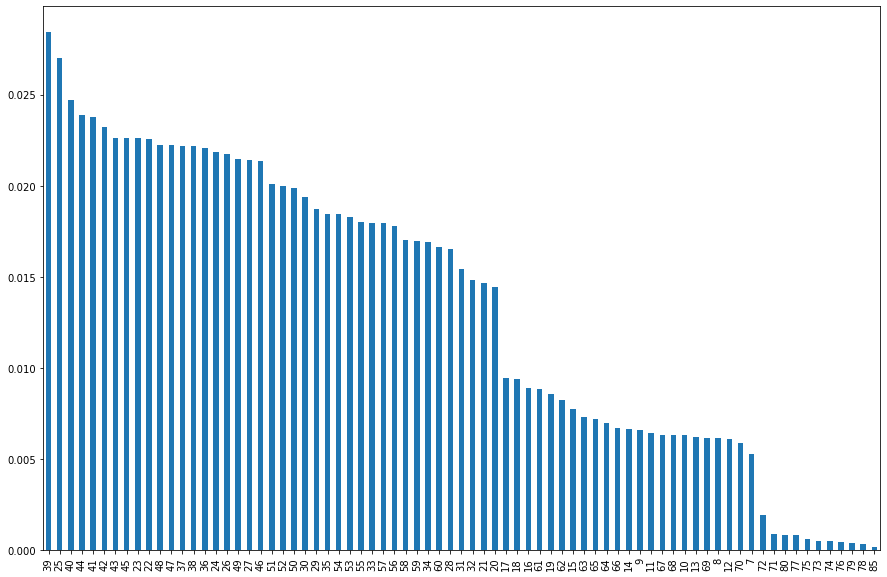

In [34]:
plt.figure(figsize=(15, 10))
df_exploratory['age'].value_counts(normalize = True).plot(kind = 'bar')

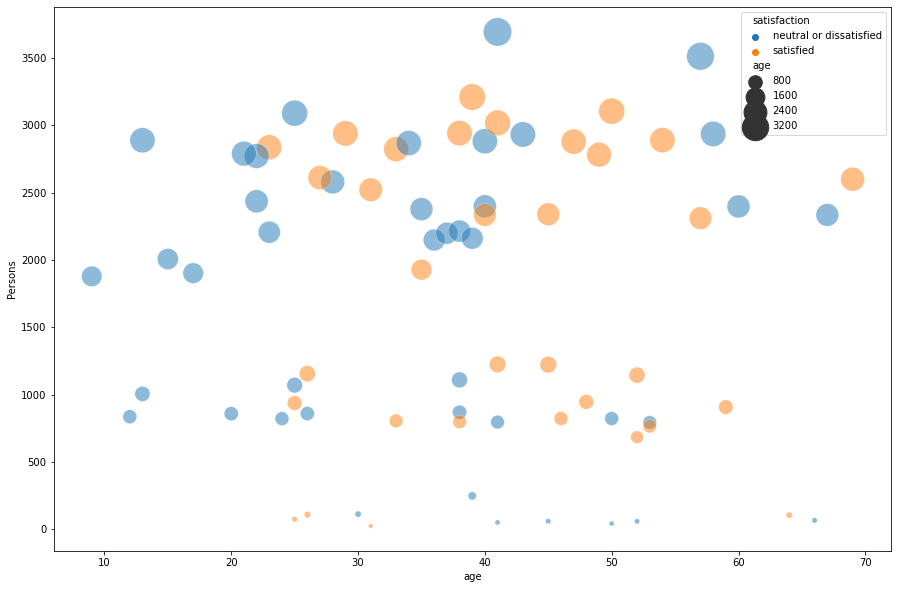

In [35]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data = df_exploratory,
                x = df_exploratory.age,
                y = df_exploratory.age.value_counts(),
                size = df_exploratory.age.value_counts(),
                alpha = 0.5,
                sizes=(20, 800),
                hue = 'satisfaction',
                )
plt.ylabel('Persons')
plt.show()

In [36]:
df_exploratory[(df_exploratory['age'] <= 18) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]

1950

In [37]:
df_exploratory[(df_exploratory['age'] <= 18) & (df_exploratory['satisfaction'] != 'satisfied')].count()[0]

9120

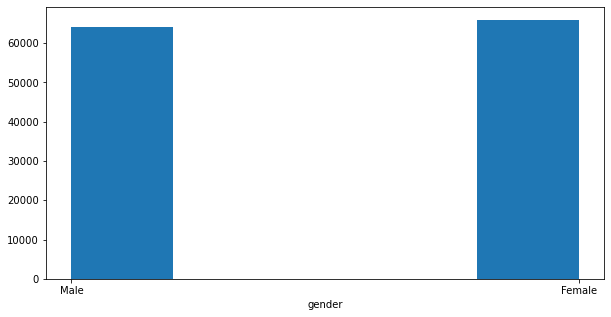

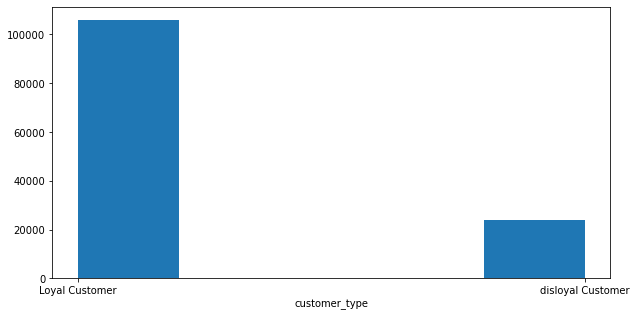

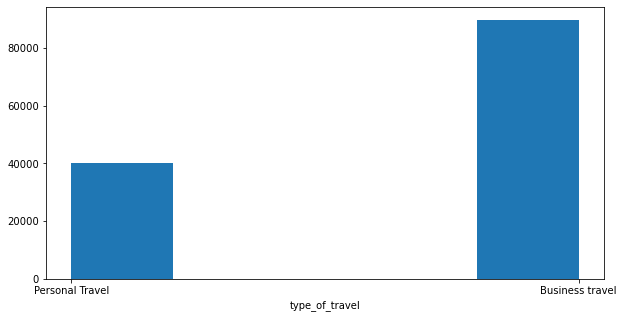

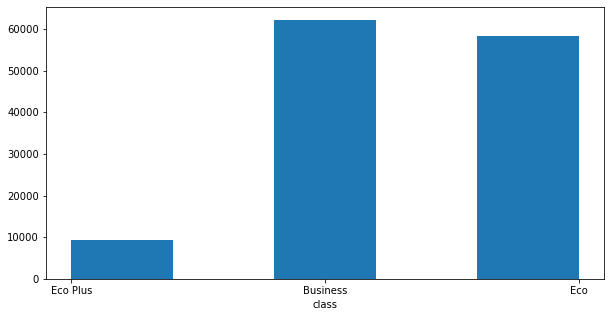

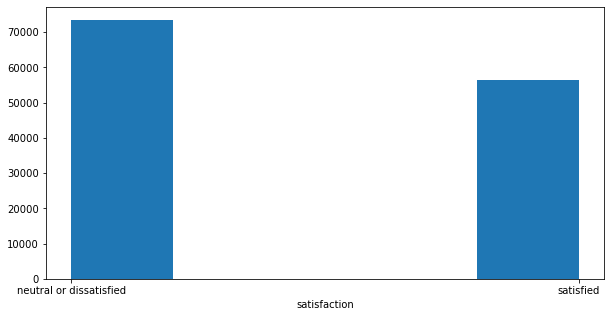

In [38]:
for atr in df_exploratory.columns:
    if df_exploratory[atr].dtype == "object":
        plt.figure(figsize=(10, 5))
        df_exploratory[atr].hist(bins = 5, grid = False, )
        plt.xlabel(atr)
        plt.show()

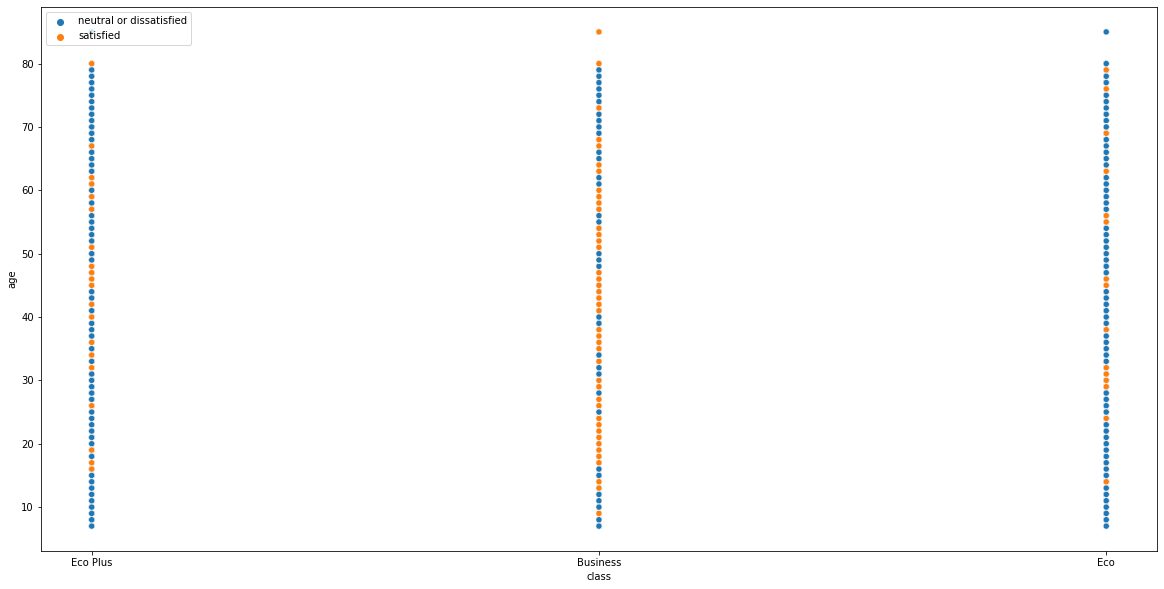

In [39]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = df_exploratory, x = 'class', y = 'age', hue = 'satisfaction')
plt.legend()
plt.show()

<AxesSubplot:xlabel='departure_delay_in_minutes', ylabel='arrival_delay_in_minutes'>

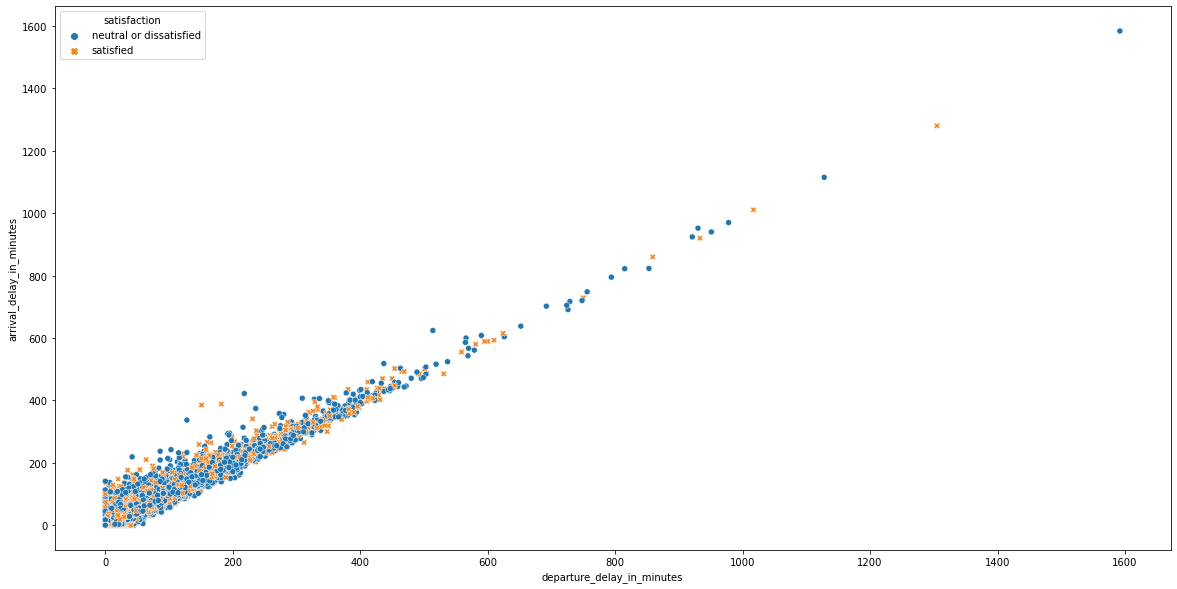

In [40]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = df_exploratory,
                x = 'departure_delay_in_minutes',
                y = 'arrival_delay_in_minutes',
                hue = 'satisfaction',
                style = 'satisfaction')

This research has a metric of 0 to 5 for each one of the 15 attributes. Wich means the maximum result for each passenger is 75 points

In [41]:
df_exploratory['max_points'] = df_exploratory.iloc[ : , 6 : -4].sum(axis = 1)
print('Max = ', df_exploratory['max_points'].max(), '\nMin = ', df_exploratory['max_points'].min())

Max =  65 
Min =  14


In [42]:
df_exploratory[df_exploratory['max_points'] >= 70]

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,max_points


In [43]:
df_exploratory[df_exploratory['max_points'] <= 15]

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,max_points
2994,Female,Loyal Customer,52,Personal Travel,Business,2586,0,1,0,2,1,2,2,1,1,0,1,2,1,3,0,0.0,satisfied,14
4091,Female,Loyal Customer,43,Business travel,Business,266,1,1,3,1,1,1,1,1,1,1,1,1,1,3,0,0.0,neutral or dissatisfied,15
5312,Female,Loyal Customer,57,Business travel,Business,1914,1,1,1,1,2,1,1,1,1,1,1,2,1,1,31,26.0,neutral or dissatisfied,15
6666,Male,Loyal Customer,42,Business travel,Business,3311,1,1,1,1,2,1,1,1,1,1,1,1,1,3,0,7.0,neutral or dissatisfied,14
20952,Female,Loyal Customer,53,Business travel,Business,3492,1,1,1,1,2,1,1,1,1,1,1,2,1,1,3,7.0,neutral or dissatisfied,15
20959,Male,Loyal Customer,32,Business travel,Eco,1092,0,0,0,3,1,0,1,1,3,1,1,1,2,1,0,0.0,satisfied,14
25220,Male,Loyal Customer,44,Business travel,Business,1744,1,1,1,1,1,1,2,1,1,1,1,2,1,2,0,0.0,neutral or dissatisfied,15
27672,Female,Loyal Customer,28,Business travel,Eco Plus,760,1,1,1,1,1,1,1,1,1,2,2,1,1,1,22,27.0,neutral or dissatisfied,15
38763,Female,Loyal Customer,55,Personal Travel,Eco,2521,0,1,0,2,0,1,1,2,1,1,2,1,3,1,0,0.0,satisfied,15
57965,Female,Loyal Customer,48,Business travel,Business,2106,1,0,0,1,3,1,1,1,1,0,1,4,1,2,97,84.0,neutral or dissatisfied,15


In [44]:
df_exploratory.groupby(['gender', 'customer_type', 'class'])['satisfaction'].value_counts()

gender  customer_type      class     satisfaction           
Female  Loyal Customer     Business  satisfied                  19722
                                     neutral or dissatisfied     6772
                           Eco       neutral or dissatisfied    17831
                                     satisfied                   4486
                           Eco Plus  neutral or dissatisfied     3134
                                     satisfied                   1111
        disloyal Customer  Business  neutral or dissatisfied     2891
                                     satisfied                   1878
                           Eco       neutral or dissatisfied     6340
                                     satisfied                   1013
                           Eco Plus  neutral or dissatisfied      662
                                     satisfied                     59
Male    Loyal Customer     Business  satisfied                  19782
                             

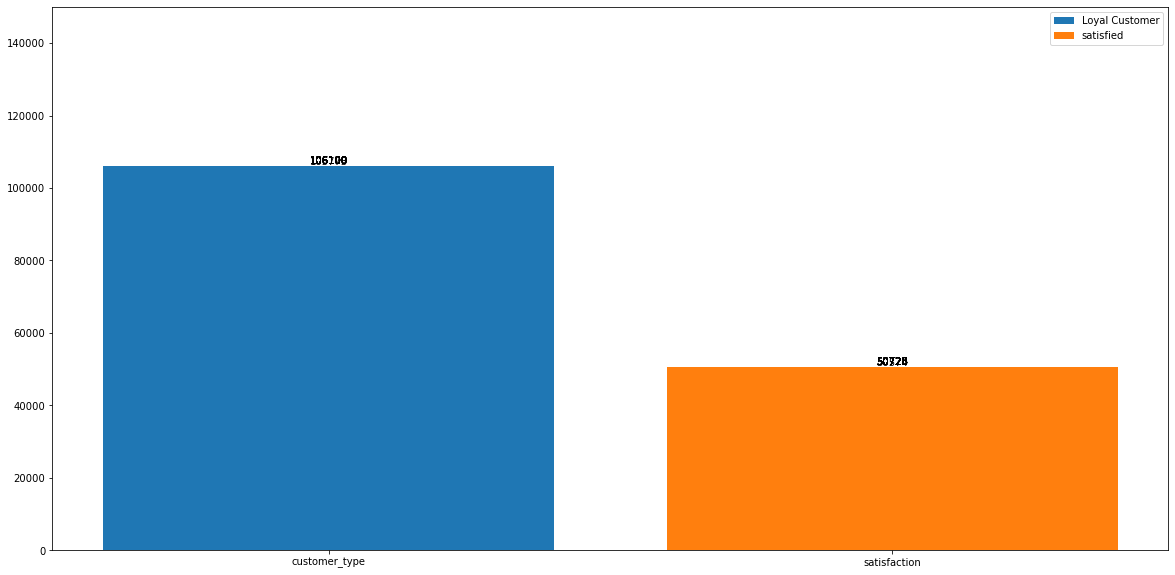

In [45]:
fig, ax = plt.subplots(figsize = (20, 10))

X = df_exploratory[df_exploratory['customer_type'] == 'Loyal Customer'].count()
y = df_exploratory[(df_exploratory['customer_type'] == 'Loyal Customer') &
    (df_exploratory['satisfaction'] == 'satisfied')].count()

customer = ax.bar('customer_type', X, label='Loyal Customer')
satisfaction = ax.bar('satisfaction', y, label='satisfied')

ax.bar_label(customer, label_type='edge')
ax.bar_label(satisfaction, label_type='edge')

plt.ylim(0, 150000)
plt.legend()

plt.show()


In [46]:
df_exploratory.describe()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,max_points
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,42.091415
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,8.567321
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,36.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,42.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,48.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,65.000000


<AxesSubplot:xlabel='Age', ylabel='Food and drink'>

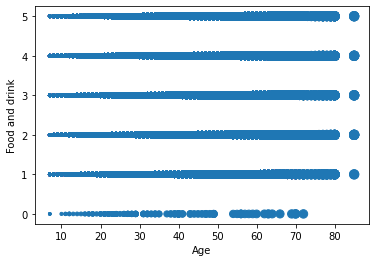

In [47]:
df_concat.plot(kind = 'scatter', x = 'Age', y = 'Food and drink', s = 'Age')

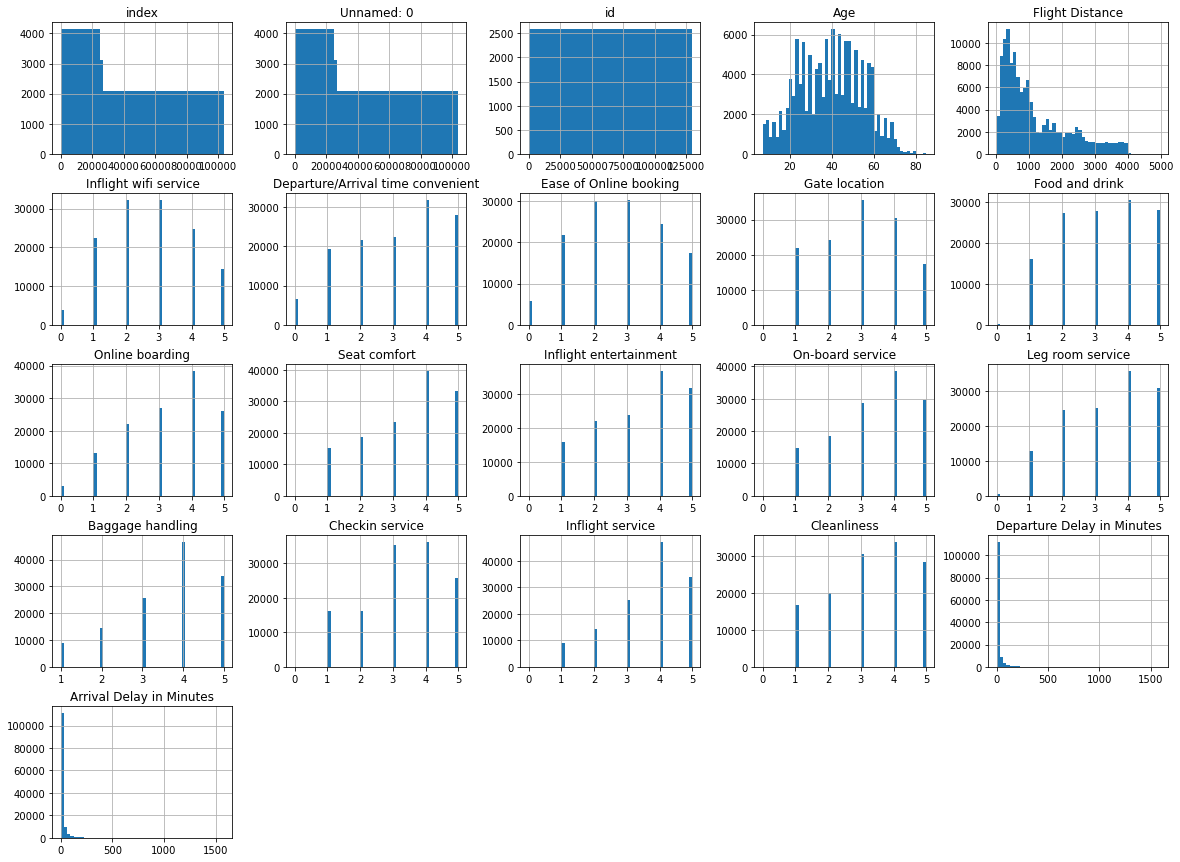

In [48]:
df_concat.hist(bins=50, figsize=(20, 15))
plt.show()

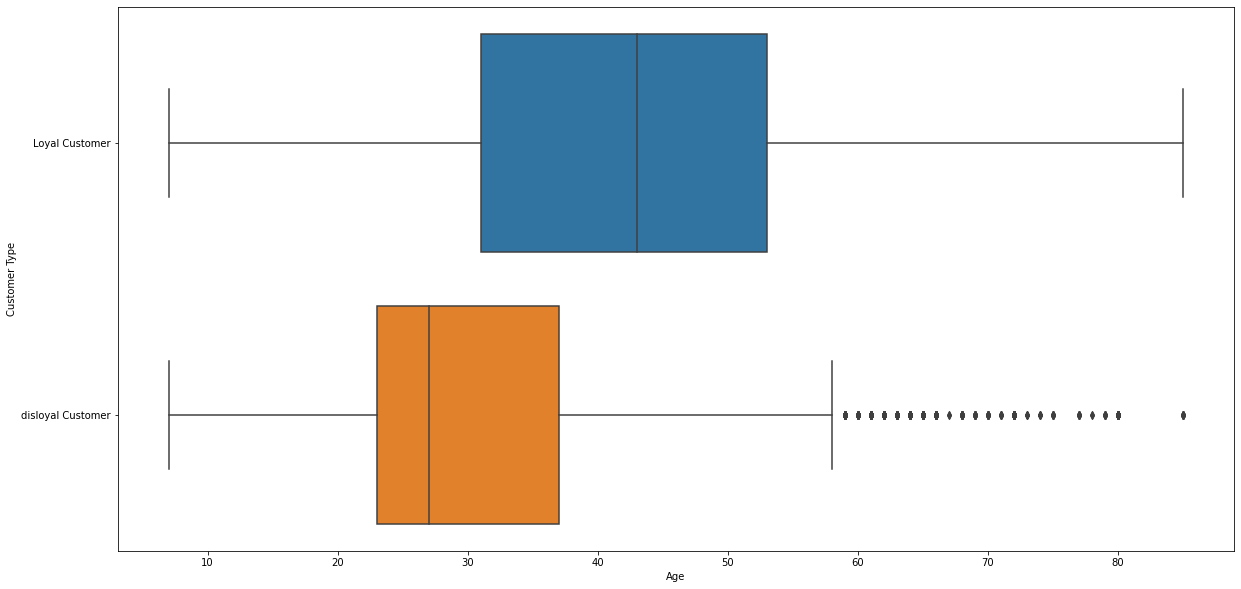

In [49]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df_concat, x = 'Age', y = 'Customer Type')
plt.show()

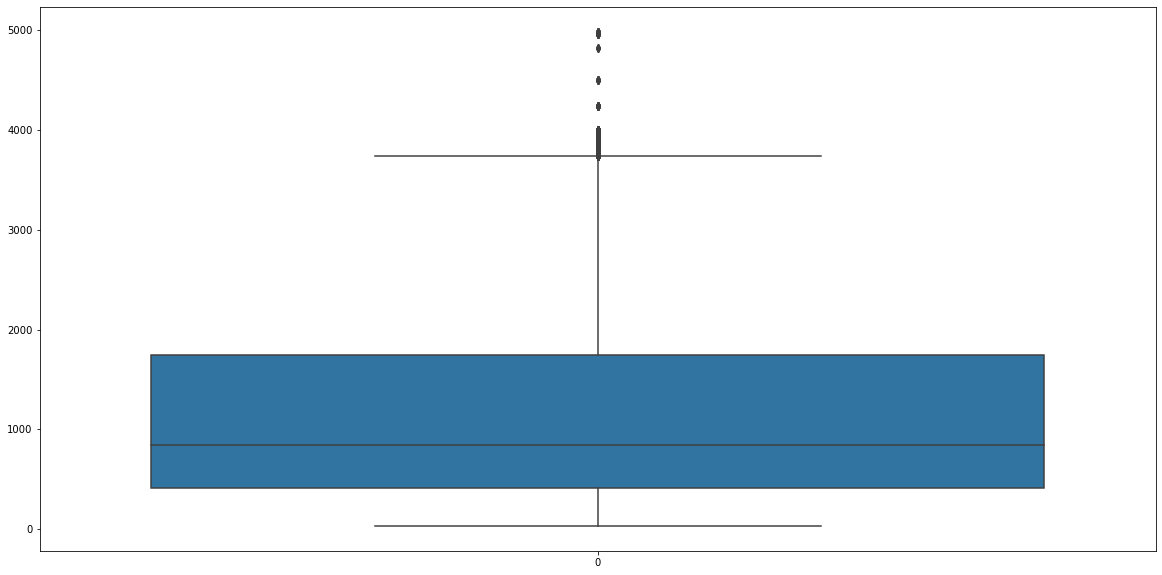

In [50]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df_concat['Flight Distance'])
plt.show()

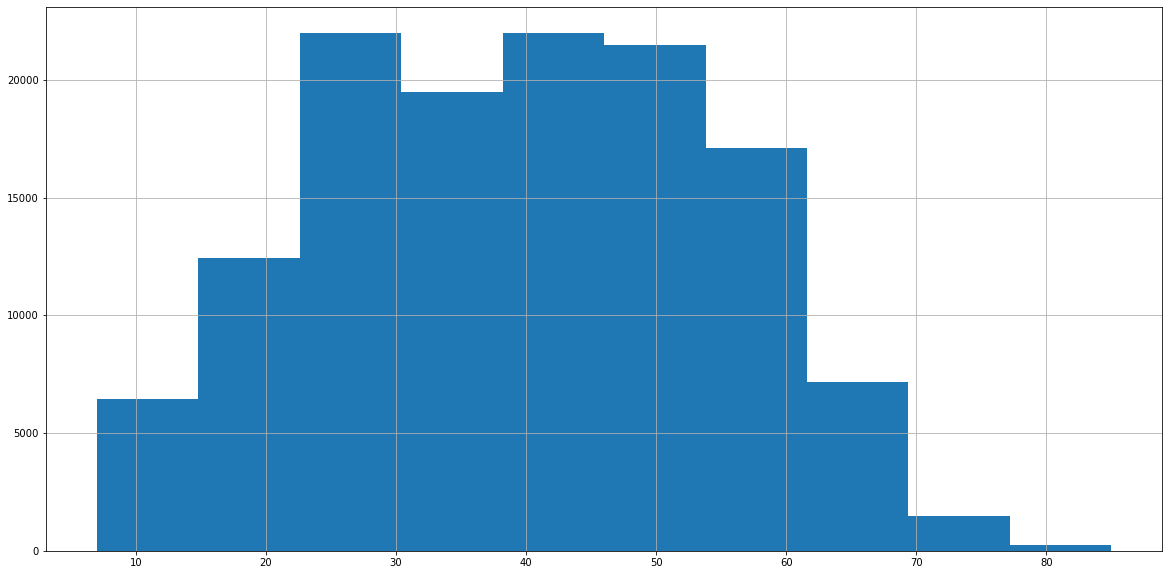

In [51]:
plt.figure(figsize=(20, 10))
df_concat['Age'].hist()
plt.show()

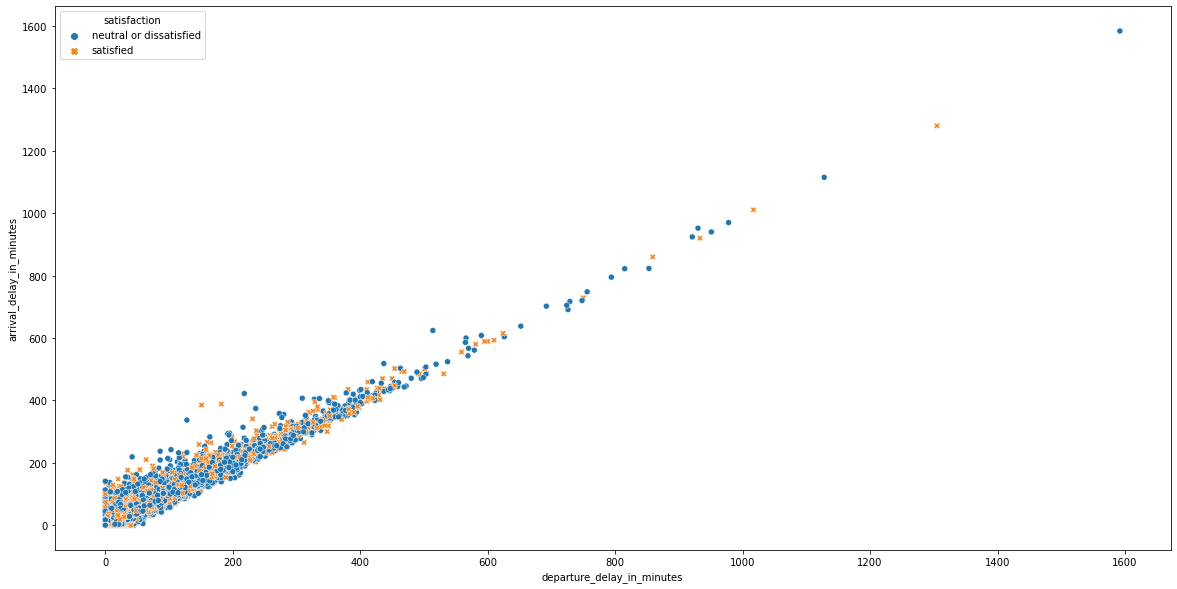

In [52]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_exploratory,  x='departure_delay_in_minutes', y='arrival_delay_in_minutes', hue='satisfaction', style='satisfaction')
plt.show()

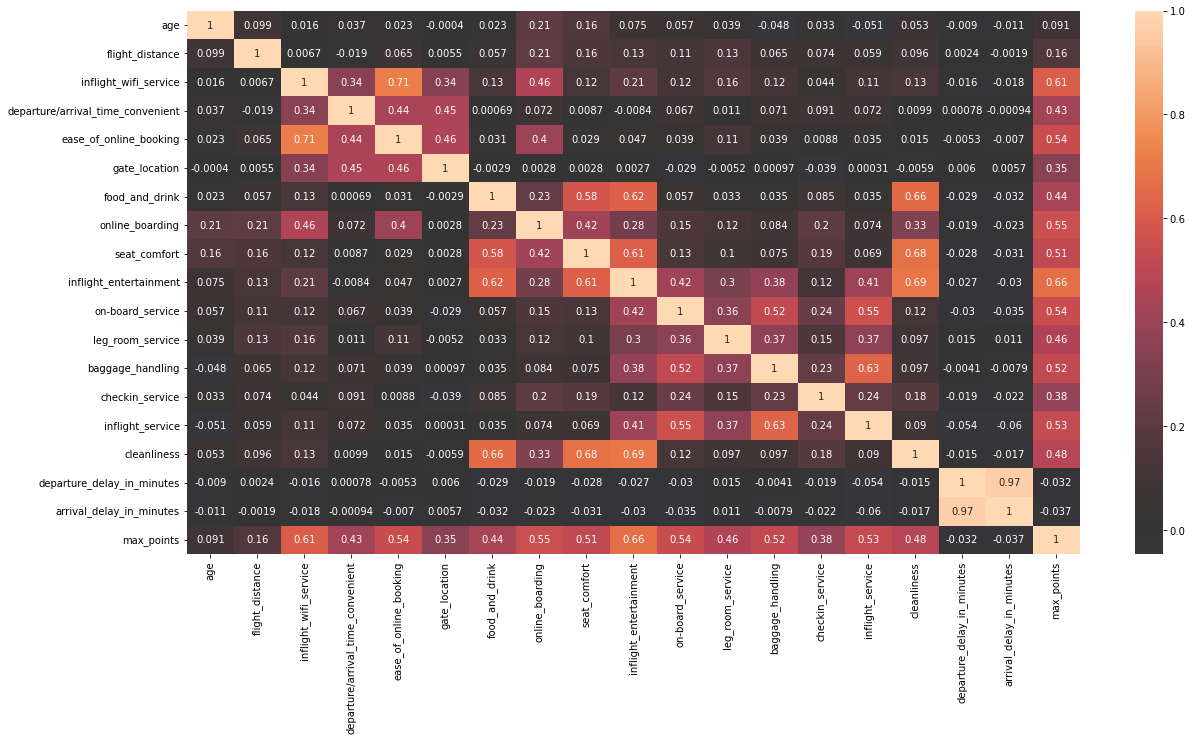

In [53]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_exploratory.corr(), annot=True, center = 0.01, robust = True, linecolor = 'black', alpha = 0.9)
plt.show()

# 3. Dropping some categorical attributes

In [54]:
df_drop = df_exploratory.copy()

In [55]:
df_drop.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,max_points
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,49
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,31
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,47
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,40
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,46


In [56]:
df_drop.drop(columns = 
    [   
        'arrival_delay_in_minutes',
        'max_points'
    ]
    , inplace = True
)

In [57]:
df_drop.loc[3]

gender                                                Female
customer_type                                 Loyal Customer
age                                                       25
type_of_travel                               Business travel
class                                               Business
flight_distance                                          562
inflight_wifi_service                                      2
departure/arrival_time_convenient                          5
ease_of_online_booking                                     5
gate_location                                              5
food_and_drink                                             2
online_boarding                                            2
seat_comfort                                               2
inflight_entertainment                                     2
on-board_service                                           2
leg_room_service                                           5
baggage_handling        

# 4. Encoding Categorical Data

In [58]:
df_encoder = df_drop.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoding_cols = df_encoder.select_dtypes(include='object').columns
encoding_cols

Index(['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction'], dtype='object')

In [61]:
df_encoder['class'] = df_encoder.iloc[:, 1].apply(lambda cl: cl.replace(' ', '_'))
df_encoder.iloc[:, 1].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [62]:
le = LabelEncoder()

df_encoder['gender'] = le.fit_transform(df_encoder['gender'])
df_encoder['customer_type'] = le.fit_transform(df_encoder['customer_type'])
df_encoder['type_of_travel'] = le.fit_transform(df_encoder['type_of_travel'])
df_encoder['class'] = le.fit_transform(df_encoder['class'])
df_encoder['satisfaction'] = le.fit_transform(df_encoder['satisfaction'])

#### GENDER >> 1 = Male; 0 = Female
#### CLASS >> 0 = Business; 1 = Eco; 2 = Eco_Plus
#### CUSTOMER TYPE >> 0 = Loyal Customer; 1 = Disloyal Customer
#### SATISFACTION >> 0 = Neutral or Dissatisfied; 1 = Satisfied
#### TYPE OF TRAVEL >> 1 = Personal Travel; 0 = Business travel

In [63]:
df_encoder.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
0,1,0,13,1,0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


# 5. Train & Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df_split = df_encoder.copy()

In [66]:
df_split.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
0,1,0,13,1,0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


In [67]:
X = df_split.iloc[:, :-1].values
y = df_split.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 6. Data Reduction

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit

In [69]:
sss = StratifiedShuffleSplit(n_splits=1, train_size=0.05, random_state=0)
sss.get_n_splits(X_train, y_train)

X = X_train
y = y_train

for train_index, test_index in sss.split(X, y):
    X_new_train = X[train_index]
    y_new_train = y[train_index]

In [70]:
X_new_train.shape, y_new_train.shape

((5195, 21), (5195,))

In [ ]:
X_new_train.columns

# 7. The model: MLP Classifier

In [91]:
import pprint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
parameters={
    'learning_rate': ["constant", "invscaling", "adaptive"], 
    'hidden_layer_sizes': [(10,), (10, 5)],
    'alpha': [0.0001, 0.001, 0.00001],
    'activation': ["logistic", "relu", "tanh"],
    'learning_rate_init': [0.001, 0.0001, 0.00001]    
            }

mlp = MLPClassifier()

clf = GridSearchCV(estimator = mlp, param_grid = parameters, n_jobs = -1, verbose = 3, cv = 10)
clf.fit(X_new_train, y_new_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 1e-05],
                         'hidden_layer_sizes': [(10,), (10, 5)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.001, 0.0001, 1e-05]},
             verbose=3)

In [93]:
clf.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001}

In [94]:
mlp = MLPClassifier(activation='logistic',
                    learning_rate_init=0.001,
                    alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate='constant', max_iter = 10000, verbose = 3, early_stopping = True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.68193558
Validation score: 0.566163
Iteration 2, loss = 0.58204207
Validation score: 0.826677
Iteration 3, loss = 0.42993848
Validation score: 0.848811
Iteration 4, loss = 0.38122548
Validation score: 0.852950
Iteration 5, loss = 0.36377733
Validation score: 0.858628
Iteration 6, loss = 0.35549950
Validation score: 0.860745
Iteration 7, loss = 0.34900970
Validation score: 0.857088
Iteration 8, loss = 0.34165352
Validation score: 0.864402
Iteration 9, loss = 0.33829487
Validation score: 0.868155
Iteration 10, loss = 0.33547103
Validation score: 0.867674
Iteration 11, loss = 0.32745723
Validation score: 0.872101
Iteration 12, loss = 0.32310661
Validation score: 0.876720
Iteration 13, loss = 0.31916453
Validation score: 0.878068
Iteration 14, loss = 0.31114195
Validation score: 0.880185
Iteration 15, loss = 0.30200291
Validation score: 0.880089
Iteration 16, loss = 0.29058129
Validation score: 0.890578
Iteration 17, loss = 0.27521763
Validation score: 0.896834
Iterat

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(10, 5), max_iter=10000, verbose=3)

In [95]:
pred_mlp = mlp.predict(X_test)
pred_mlp

array([0, 1, 0, ..., 1, 1, 0])

In [96]:
conf_matrix = confusion_matrix(y_test, pred_mlp)
acc_score = accuracy_score(y_test, pred_mlp)
conf_matrix, acc_score

(array([[14001,   621],
        [ 1108, 10246]], dtype=int64),
 0.9334385586695411)

In [97]:
class_repo = classification_report(y_test, pred_mlp)
pprint.pprint(class_repo)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.93      0.96      0.94     14622\n'
 '           1       0.94      0.90      0.92     11354\n'
 '\n'
 '    accuracy                           0.93     25976\n'
 '   macro avg       0.93      0.93      0.93     25976\n'
 'weighted avg       0.93      0.93      0.93     25976\n')


In [98]:
prob = mlp.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)

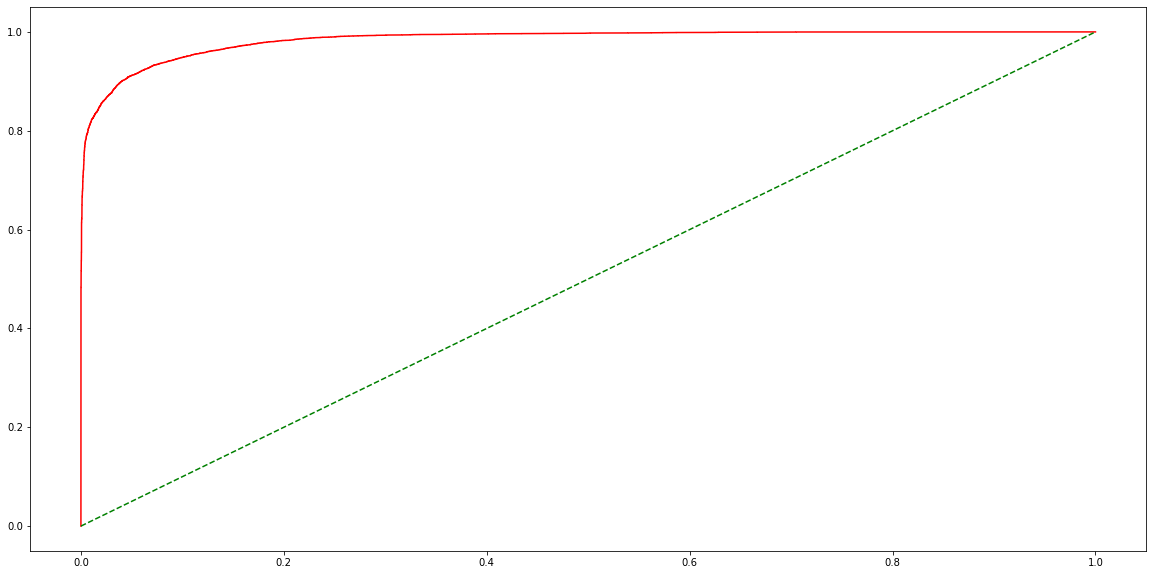

In [99]:
plt.figure(figsize=(20, 10))
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()

In [104]:
import pickle

MLP_Filename = open(r'C:\Users\viniciushc\Git_Vinicius\AirlinePassengersSatisfaction\model\Bias_MLP_model.pkl', 'wb')
pickle.dump(mlp, MLP_Filename)